# Figure 7 - Cell-type-specific behavior maps

Create (DC x amplitude) behavior maps of RS and LTS neurons at various pulse repetition frequencies, along with characteristic Q-V traces, from SONIC model predictions.

### Imports

In [1]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
from PySONIC.utils import logger
from PySONIC.neurons import getPointNeuron
from PySONIC.plt import cm2inch, FiringRateMap
from utils import subdirectory, codes, saveFigsAsPDF

logger.setLevel(logging.INFO)

### Functions

In [2]:
def plotMapAndTraces(subdir, pneuron, a, Fdrive, tstim, amps, PRF, DCs, cov,
                     FRbounds=None, thresholds=True, insets=None, tbounds=None,
                     Vbounds=None, map_figsize=None, trace_figsize=None, fs=8, lw=1):

    mapcodes = codes(a, pneuron, Fdrive, PRF, tstim)
    subsubdir = os.path.join(subdir, ' '.join(mapcodes))
    if not os.path.isdir(subsubdir):
        os.mkdir(subsubdir)
    figs = {}

    # FR map
    frmap = FiringRateMap(subsubdir, pneuron, a, 1., Fdrive, tstim, PRF, amps, DCs)
    frmap.run(mpi=True)
    mapfig = frmap.render(
        zbounds=FRbounds, thresholds=thresholds, mpi=True, figsize=map_figsize, fs=fs, insets=insets)
    figs['map_' + '_'.join(mapcodes)] = mapfig

    # Related inset traces
    for inset in insets:
        DC, Adrive = inset[:2]
        tracefig = frmap.plotTimeseries(DC, Adrive, fs=fs, patches='none')
        tracefig.set_size_inches(trace_figsize)
        ax = tracefig.axes[0]
        if tbounds is not None:
            ax.set_xlim(tbounds)
        if Vbounds is not None:
            ax.set_ylim(Vbounds)
        ax.set_title(f'DC = {DC:.0f}%, A = {Adrive:.1f} kPa', pad=10.0)
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=fs)
        figcode = 'VQ trace {} {:.1f}kPa {:.0f}%DC'.format(pneuron.name, Adrive, DC)
        figs[figcode] = tracefig

    return figs

### Data sub-directory

In [3]:
subdir = subdirectory('maps')

### Plot parameters

In [4]:
figindex = 7
pltargs = {
    'map_figsize': cm2inch(16, 11.6),
    'trace_figsize': cm2inch(14, 6),
    'fs': 14,
    'lw': 2,
    'FRbounds': (1e0, 1e3),  # Hz
    'tbounds': (-10, 240.),  # s
    'Vbounds': (-200, 50),  # mV
    'thresholds': True
}
figs = {}

### Simulation parameters

In [5]:
a = 32e-9       # m
Fdrive = 500e3  # Hz
tstim = 1.0     # s
cov = 1.0
amps = np.logspace(np.log10(10), np.log10(600), num=30) * 1e3  # Pa
DCs = np.arange(1, 101) * 1e-2
sim_args = lambda pneuron, PRF: [subdir, pneuron, a, Fdrive, tstim, amps, PRF, DCs, cov]

## 10 Hz PRF

In [6]:
subindex = 'a'
PRF = 1e1  # Hz

### RS neuron

 29/04/2020 17:07:43: Firing rate range: 2 - 799 Hz


[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.00Hz, DC=1.0%), 1.0, 'sonic', None]
[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.00Hz, DC=2.0%), 1.0, 'sonic', None]
[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.00Hz, DC=3.0%), 1.0, 'sonic', None]
[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.00Hz, DC=4.0%), 1.0, 'sonic', None]
[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.00Hz, DC=5.0%), 1.0, 'sonic', None]
[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.00Hz, DC=6.0%), 1.0, 'sonic', None]
[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.00Hz, DC=7.0%), 1.0, 'sonic', None]
[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.00Hz, DC=8.0%), 1.0, 'sonic', None]
[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.00Hz, DC=9.0%), 1.0, 'sonic', None]
[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.00Hz, DC=10.0%), 1.0, 'sonic', None]
[AcousticDrive(f=500kHz), PulsedProtocol(tstim=1s, PRF=10.0

 29/04/2020 17:07:44: NeuronalBilayerSonophore(32.0 nm, CorticalRS): sonic simulation @ f = 500kHz, A = 10.00kPa, tstim = 1s, PRF = 10.00Hz, DC = 1.0%
 29/04/2020 17:07:49: NeuronalBilayerSonophore(32.0 nm, CorticalRS): sonic simulation @ f = 500kHz, A = 600.00kPa, tstim = 1s, PRF = 10.00Hz, DC = 1.0%


KeyboardInterrupt: 

C:\Users\lemaire\Anaconda3\lib\site-packages\matplotlib\colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


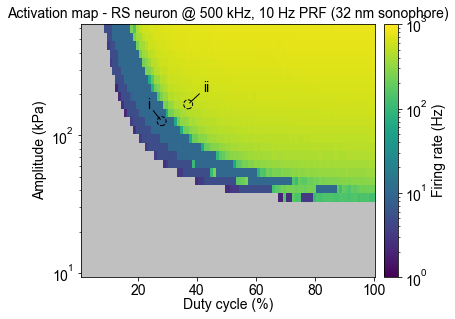

In [7]:
pneuron = getPointNeuron('RS')
insets = [(28., 126.96, 'i', 'ul'), (37., 168.39, 'ii', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

In [ ]:
pneuron = getPointNeuron('LTS')
insets = [(8, 47.26, 'iii', 'lr'), (30, 146.22, 'iv', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

## 100 Hz PRF

In [ ]:
subindex = 'b'
PRF = 1e2  # Hz

### RS neuron

In [ ]:
pneuron = getPointNeuron('RS')
insets = [(51, 452.40, 'i', 'ul'), (56, 452.40, 'ii', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

In [ ]:
pneuron = getPointNeuron('LTS')
insets = [(13, 193.92, 'iii', 'lr'), (43, 257.19, 'iv', 'ul')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

## 1 kHz PRF

In [ ]:
subindex = 'c'
PRF = 1e3  # Hz

### RS neuron

In [ ]:
pneuron = getPointNeuron('RS')
insets = [(40, 110.25, 'i', 'ul'), (.64, 193.92, 'ii', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### LTS neuron

In [ ]:
pneuron = getPointNeuron('LTS')
insets = [(10, 47.26, 'iii', 'lr'), (53, 168.39, 'iv', 'ur')]
out = plotMapAndTraces(*sim_args(pneuron, PRF), insets=insets, **pltargs)
figs.update({f'{subindex}_{k}': v for k, v in out.items()})

### Save figure panels

Save figure panels as **pdf** in the *figs* sub-folder:

In [ ]:
saveFigsAsPDF(figs, figindex)